<a href="https://colab.research.google.com/github/mbrady4/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [158]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import dataset with informative feature names
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None,
                      names=['Age at time of operation', 'Year of operation', 'Number of Positive Nodes','Survival Status'])

#Make Copy with descriptive name
survival = df.copy()

#Number of observations matches number listed on UCI description page
survival.shape

(306, 4)

In [159]:
survival.head(10)

,Age at time of operation,Year of operation,Number of Positive Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [160]:
#Verify that we have no missing values
survival.isnull().sum()

Age at time of operation    0
Year of operation           0
Number of Positive Nodes    0
Survival Status             0
dtype: int64

In [161]:
survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age at time of operation    306 non-null int64
Year of operation           306 non-null int64
Number of Positive Nodes    306 non-null int64
Survival Status             306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [162]:
#Changing Survival Variable
survival['Survival Status'] = survival['Survival Status'].replace(2, 0)

#Verify that survival status exampeles with 2 have been changed to 0
survival.head(10)

,Age at time of operation,Year of operation,Number of Positive Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [163]:
#Generate initial overview of dataset
survival.describe()

,Age at time of operation,Year of operation,Number of Positive Nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


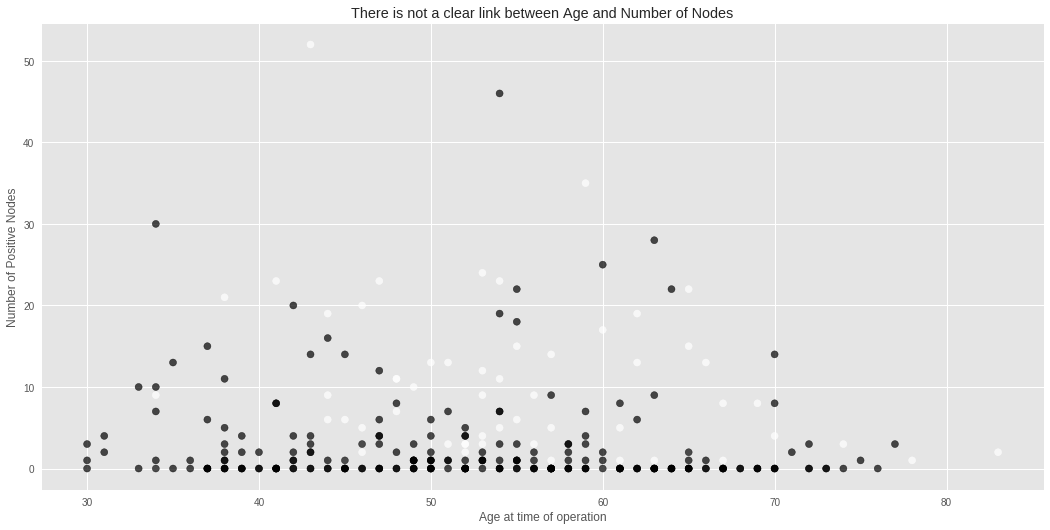

In [164]:
#Create scatterplot to investigate relatino between age and positive nodes
plt.style.use('ggplot')
plt.figure(figsize=(16,8))

plt.title('There is not a clear link between Age and Number of Nodes')
plt.xlabel('Age at time of operation')
plt.ylabel('Number of Positive Nodes')
plt.scatter(survival['Age at time of operation'], survival['Number of Positive Nodes'],
           alpha=0.7,
           c=survival['Survival Status']) #Set color of dot, white dots mean survival=0, black dots mean survial = 1
plt.show()

In [165]:
#Bin "Number of positive nodes" for better readability
nodes_bin = pd.cut(survival['Number of Positive Nodes'], 10)

survival_bin = survival.copy()

#Created custom bins for the number of positive nodes because 
#the data is heavily skewed toward low numbers of positive nodes

custom_bins = [-1, 1, 2, 5, 10, 52]
survival_bin['node_bin'] = pd.cut(survival_bin['Number of Positive Nodes'], custom_bins)


#Create Two Variable Cross Tab Between Survival Status and Age
#pd.crosstab(survival['Survival Status'],nodes_bin, normalize='columns')
node_ct = pd.crosstab(survival_bin['Survival Status'],survival_bin['node_bin'], normalize='columns')
node_ct

node_bin,"(-1, 1]","(1, 2]","(2, 5]","(5, 10]","(10, 52]"
Survival Status,,,,,
0,0.152542,0.25,0.358974,0.4,0.575
1,0.847458,0.75,0.641026,0.6,0.425


In [166]:
survival_bin['node_bin'].value_counts()

(-1, 1]     177
(10, 52]     40
(2, 5]       39
(5, 10]      30
(1, 2]       20
Name: node_bin, dtype: int64

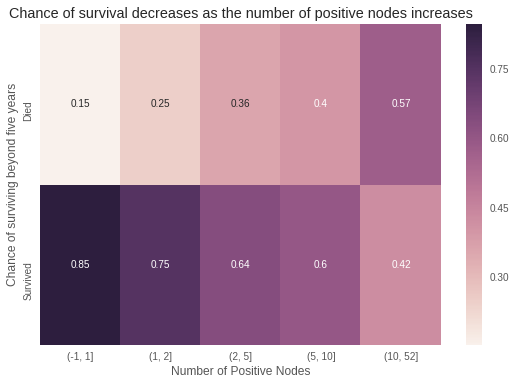

In [167]:
ax = sns.heatmap(node_ct,
                #cmap='YlGnBu',
                annot=True,
                yticklabels=['Died', 'Survived'])
ax.set(xlabel='Number of Positive Nodes', ylabel='Chance of surviving beyond five years', title='Chance of survival decreases as the number of positive nodes increases')
plt.show()

In [168]:
#Create three variable crosstab to explore relation between age, year of operation, and survival

#Create bins for age and year of operation
age_bins = pd.cut(survival['Age at time of operation'], 4)
year_bins = pd.cut(survival['Year of operation'], 4)

pd.crosstab([age_bins, survival['Survival Status']],year_bins,
           rownames=['Age','Survival Status'],
           colnames=['Year of Operation'])

Year of Operation                (57.989, 60.75]  (60.75, 63.5]  \
Age             Survival Status                                   
(29.947, 43.25] 0                              5              0   
                1                             26             13   
(43.25, 56.5]   0                             11              9   
                1                             23             27   
(56.5, 69.75]   0                              6              8   
                1                             15             17   
(69.75, 83.0]   0                              3              1   
                1                              2              4   

Year of Operation                (63.5, 66.25]  (66.25, 69.0]  
Age             Survival Status                                
(29.947, 43.25] 0                            5              3  
                1                           16              5  
(43.25, 56.5]   0                           14              6  
                1                           19             15  
(56.5, 69.75]   0                            6              2  
                1                           22             12  
(69.75, 83.0]   0                            2              0  
                1                            3              6

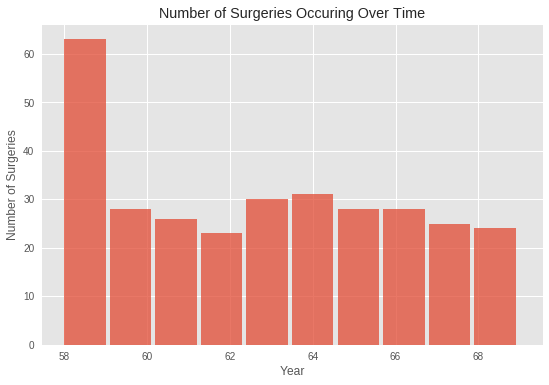

In [169]:
#Histogram to show absolute number of surgeries occuring over time (utilizing bins from prior cell)


plt.title('Number of Surgeries Occuring Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Surgeries')
plt.hist(survival['Year of operation'], bins=10, alpha=0.75, width=1)

plt.show()

In [170]:
# Note I want to evaluate the relationship between age and survival but the wide variance in number of nodes was obscuring the data. Thus I created a new dataset that contains only patients with fewer than 5 positive nodes.
few_nodes = survival.copy()
few_nodes = few_nodes[few_nodes['Number of Positive Nodes'] < 5]
few_nodes.describe()

,Age at time of operation,Year of operation,Number of Positive Nodes,Survival Status
count,230.000000,230.000000,230.000000,230.000000
mean,52.908696,62.800000,0.839130,0.817391
std,11.125933,3.283411,1.231053,0.387188
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,0.000000,1.000000
75%,61.000000,66.000000,1.000000,1.000000
max,83.000000,69.000000,4.000000,1.000000


In [171]:
ct = pd.crosstab(age_bins, few_nodes['Survival Status'], normalize='index')

ct

Survival Status,0,1
Age at time of operation,,
"(29.947, 43.25]",0.160714,0.839286
"(43.25, 56.5]",0.195402,0.804598
"(56.5, 69.75]",0.147059,0.852941
"(69.75, 83.0]",0.315789,0.684211


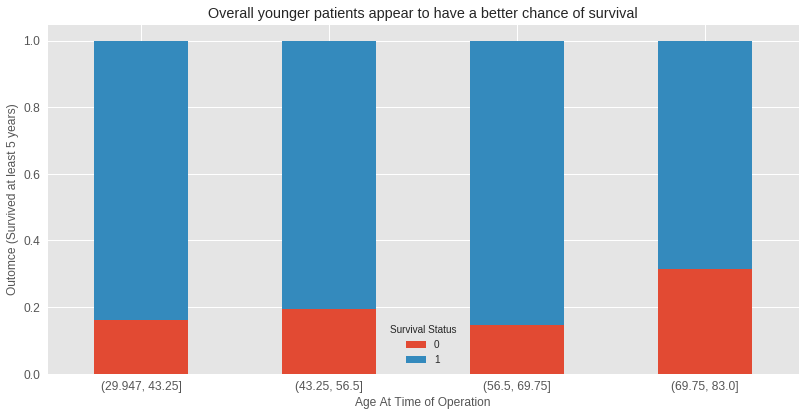

In [172]:
ax = ct.plot(kind='bar', stacked=True, legend=True, figsize=(12,6), rot=0, fontsize=12, title='Overall younger patients appear to have a better chance of survival')
plt.xlabel('Age At Time of Operation')
plt.ylabel('Outomce (Survived at least 5 years)')
plt.show()

## Part 3 - Analysis and Interpretation

- What is at least one feature that looks to have a positive relationship with survival?

> The age of patients has a clear positive relationship with survival. 
       
- What is at least one feature that looks to have a negative relationship with survival?

> As shown in the two variable crosstab, the number of positive (cancerous) nodes has a negative relationship with survival. 

- How are those two features related with each other, and what might that mean?

> As shown in the scatterplot there is not a clear link between these variables in the dataset. It appears that middle aged people are most likely to have a large number of nodes; however, there may be a confounding variable. It is possible that older patients with large number of nodes are electing not to perform surgery (due to low probability of survival) and thus not appearing in this dataset.
